In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inbox_file = r'InboxExport/Inbox.xlsx'

In [3]:
df = pd.read_excel(inbox_file)

In [4]:
df.head()

,Subject,Body,From: (Name),From: (Address),From: (Type),To: (Name),To: (Address),To: (Type),CC: (Name),CC: (Address),...,Categories,Importance,Mileage,Sensitivity,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Assistance with EDGE Presentation,"Hi everyone,\r\n\r\n \r\n\r\nWould anyone be a...",Erin Trautner,/O=ESRI/OU=WASHDC/CN=RECIPIENTS/CN=ETRAUTNER,EX,national-government-se,/o=ESRI/ou=Exchange Administrative Group (FYDI...,EX,NaN,NaN,...,NaN,Normal,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
1,FW: REAL ID Compliance enforcement and impacts...,"Good morning team,\r\n\r\n \r\n\r\nJust wanted...",Erin Trautner,/O=ESRI/OU=WASHDC/CN=RECIPIENTS/CN=ETRAUTNER,EX,national-government-se,/o=ESRI/ou=Exchange Administrative Group (FYDI...,EX,NaN,NaN,...,NaN,High,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
2,FW: Next EDGE: Stories from Esri's Response to...,"Hi James,\r\n\r\n \r\n\r\nHere is the email I ...",Eileen Seifert,/O=ESRI/OU=EXCHANGE ADMINISTRATIVE GROUP (FYDI...,EX,James Jones,/o=ESRI/ou=Exchange Administrative Group (FYDI...,EX,NaN,NaN,...,NaN,Normal,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
3,Learning Plan Updates: James Jones,"Hello James, \r\n \r\nUpdates have been made ...",LMSAdmin@esri.com,LMSAdmin@esri.com,SMTP,James Jones,/o=ESRI/ou=Exchange Administrative Group (FYDI...,EX,NaN,NaN,...,NaN,Normal,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
4,Eileen Seifert has added you to a collaborated...,Eileen Seifert has added you to a folder: \t\r...,ESeifert@esri.com,ESeifert@esri.com,SMTP,James Jones,/o=ESRI/ou=Exchange Administrative Group (FYDI...,EX,NaN,NaN,...,NaN,Normal,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(12894, 25)

In [6]:
G = nx.MultiDiGraph()
edges = G.edges(keys=True)

In [7]:
my_name = 'James Jones'

In [8]:
for row in df.iterrows():
    sender = row[1]['From: (Name)']
    try:
        for person in row[1]['To: (Name)'].split(";"):
            if person != my_name:
                G.add_edge(sender, person, sent_type='To')
    except: 
        pass
        
    try:
        for cc in row[1]['CC: (Name)'].split(";"):
            if cc != my_name:
                G.add_edge(sender, cc, sent_type='CC')
    except:
        pass
    
    try:
        for bcc in row[1]['BCC: (Name)'].split(";"):
            if bcc != my_name:
                G.add_edge(sender, bcc, sent_type='BCC')
    except:
        pass

In [9]:
print("Total number of nodes in multi graph:  " + repr(len(G.nodes)))
print("Total number of edges in multi graph:  " + repr(len(G.edges)))

Total number of nodes in multi graph:  2016
Total number of edges in multi graph:  24254


In [10]:
graph_density = nx.density(G)
print("Graph density:  " + repr(graph_density))

Graph density:  0.005970597502855567


In [11]:
graph_info = nx.info(G)
print("Graph Information")
print(graph_info)

Graph Information
Name: 
Type: MultiDiGraph
Number of nodes: 2016
Number of edges: 24254
Average in degree:  12.0308
Average out degree:  12.0308


In [12]:
#  Compute Degree Centrality
degree = dict(G.degree())
nx.set_node_attributes(G, name='degree', values=degree)

In [13]:
#  Compute In-Degree/Out-Degree Centrality
in_degree = dict(nx.in_degree_centrality(G))
out_degree = dict(nx.out_degree_centrality(G))
nx.set_node_attributes(G, name='in degree', values=in_degree)
nx.set_node_attributes(G, name='out degree', values=out_degree)

In [14]:
#  Compute Closeness Centrality
closeness = dict(nx.closeness_centrality(G))
nx.set_node_attributes(G, name='closeness', values=closeness)

In [15]:
#  Compute Betweenness Centrality for nodes and edges
node_betweenness = dict(nx.betweenness_centrality(G))
nx.set_node_attributes(G, name='betweenness', values=node_betweenness)

In [16]:
# View Information about an Individual Node
nodes_list = dict(G.nodes.data())

In [17]:
email_connectivity = []
for node in nodes_list.items():
    name = node[0]
    degree_cen = node[1]['degree']
    in_degree_cen = node[1]['in degree']
    out_degree_cen = node[1]['out degree']
    closeness_cen = node[1]['closeness']
    betweenness = node[1]['betweenness']
    iRow = [name, degree_cen, in_degree_cen, out_degree_cen, closeness_cen, betweenness]
    email_connectivity.append(iRow)
    
email_connectivity_df = pd.DataFrame(email_connectivity, columns=['Name', 'Degree', 'In Degree', 'Out Degree', 'Closeness', 'Betweenness'])

In [22]:
email_connectivity_df.sort_values('In Degree',ascending=False).head(10)

,Name,Degree,In Degree,Out Degree,Closeness,Betweenness
546,EX,1483,0.369727,0.366253,0.000496,0.000000
7,James Sullivan,1395,0.232754,0.459553,0.082811,0.012257
9,Andrew King,415,0.189578,0.016377,0.074087,0.000877
4,Thomas Eberhard,482,0.188089,0.051117,0.077013,0.011014
171,Tim Murphy,655,0.186104,0.138958,0.076600,0.018258
10,Jim Bauer,452,0.179156,0.045161,0.071020,0.001758
14,Scott Cecilio,570,0.167246,0.115633,0.072583,0.007720
8,John Fry,467,0.163772,0.067990,0.072583,0.001358
12,Nick Wiegand,326,0.160298,0.001489,0.076712,0.000000
731,Tyson Quink,490,0.134988,0.108189,0.072338,0.000842


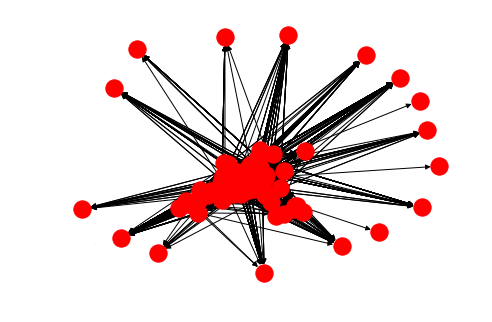

In [23]:
defense_team = nx.ego_graph(G, 'James Sullivan')
pos = nx.spring_layout(defense_team)
nx.draw(defense_team)

In [24]:
defense_team_dict = dict(defense_team.nodes.data())

In [25]:
defense_team_subgraph = []
for node in defense_team_dict.items():
    name = node[0]
    degree_cen = node[1]['degree']
    in_degree_cen = node[1]['in degree']
    out_degree_cen = node[1]['out degree']
    closeness_cen = node[1]['closeness']
    betweenness = node[1]['betweenness']
    iRow = [name, degree_cen, in_degree_cen, out_degree_cen, closeness_cen, betweenness]
    defense_team_subgraph.append(iRow)
    
defense_team_df = pd.DataFrame(defense_team_subgraph, columns=['Name', 'Degree', 'In Degree', 'Out Degree', 'Closeness', 'Betweenness'])


In [29]:
defense_team_df.sort_values('Betweenness',ascending=False).head()

,Name,Degree,In Degree,Out Degree,Closeness,Betweenness
83,Tim Murphy,655,0.186104,0.138958,0.076600,0.018258
55,Jeffrey Dawley,666,0.072953,0.257568,0.066921,0.013360
57,James Sullivan,1395,0.232754,0.459553,0.082811,0.012257
54,Eben Wells,1939,0.067990,0.894293,0.062259,0.011666
6,Thomas Eberhard,482,0.188089,0.051117,0.077013,0.011014
